# Testing GD Variants on FashionMNIST

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

https://github.com/zalandoresearch/fashion-mnist


<img src="https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png">



In [1]:
!pip install tensorflow-addons

In [2]:
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

--2019-12-10 08:11:47--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.73.190
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.73.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz.1’

train-images-idx3-u 100%[===================>]  25.20M  11.8MB/s    in 2.1s    

2019-12-10 08:11:49 (11.8 MB/s) - ‘train-images-idx3-ubyte.gz.1’ saved [26421880/26421880]

--2019-12-10 08:11:50--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.73.190
Connecting to fashion-mnist.s3-website.eu-central-1.

In [0]:
import numpy as np
import os
import gzip

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`.
    """
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte.gz' % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [4]:
from sklearn.model_selection import train_test_split
train_images, train_labels = load_mnist('.')
# because of some limitations of Keras's softmax implementation, it's 
# advisable to normalise the images by dividing the intensities by the
# maximal 255 value
train_images = train_images / 255.

#valid_test_images, valid_test_labels = load_mnist('.', 't10k')
#valid_test_images = valid_test_images / 255. # the same normalization for valid and test

X_train, X_valid_test, y_train, y_valid_test = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.5, random_state=42)


train_images= X_train
train_labels= y_train
valid_images= X_valid
valid_labels= y_valid

test_images = X_test
test_labels = y_test



print(train_images.shape, valid_images.shape, test_images.shape)

(54000, 784) (3000, 784) (3000, 784)


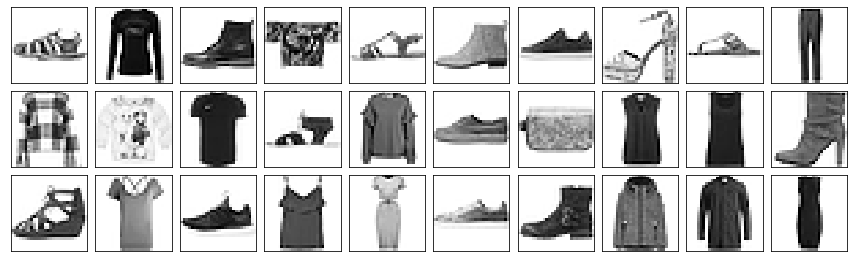

In [5]:
from matplotlib import pyplot as plt
from math import ceil

def show_images(images):
    """Show images in a grid
    """
    n_rows = ceil(len(images) / 10)
    fig, ax = plt.subplots(n_rows, 10, figsize=(15, 1.5 * n_rows),
                           subplot_kw={'xticks':[], 'yticks':[]},
                           gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, _ in enumerate(images):
        # below we scale back the intensities to display the images correctly
        ax[i // 10, i % 10].imshow(255 * images[i].reshape(28, 28), cmap='Greys')

show_images(train_images[:30])
plt.show();

In [0]:
#import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta, Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.regularizers import l1
from tensorflow.keras.backend import clear_session
#import tensorflow.addons as tfa
import tensorflow_addons as tfa
import pandas as pd


In [0]:
# Fix seeds for (hopefully) reproducible results
from numpy.random import seed
seed(14)
#from tensorflow import set_random_seed
#set_random_seed(19)


In [0]:
input_size = 784
n_classes = 10
layer_size = 120
activation_function='relu'
dropout_rate=0.4
layer_blocks=4

In [9]:
def generate_model():


  input_layer = Input(shape=(input_size,))
  cur_last_layer = input_layer

  for i in range(layer_blocks):
    cur_last_layer=Dense(units=layer_size, activation=activation_function)(cur_last_layer)
    cur_last_layer=Dropout(rate=dropout_rate)(cur_last_layer)
  
  #Use Softmax!
  predictions = Dense( n_classes , activation='softmax')(cur_last_layer)

  # Full model
  # Instantiate with input and output
  model = Model(inputs=input_layer,outputs=predictions)

  return model

clear_session()
model=generate_model()

model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 120)               94200     
_________________________________________________________________
dropout (Dropout)            (None, 120)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               14520     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               14520     
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)               0     

In [0]:





def compile_fit(model,selected_optimizer,nr_epochs):
  #Compile
  model.compile(optimizer=selected_optimizer,
              loss=loss,
              metrics=['accuracy'])
  #fit and return history
  history = model.fit(x=train_images, y=train_labels,
                    validation_data=(valid_images, valid_labels),
                    epochs=nr_epochs,
                    batch_size=200,
                    verbose=0,
                    callbacks=[save_callback]
                   )
  return history



In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Loss 
loss = sparse_categorical_crossentropy 


# Optimizers
sgd=SGD()
adam=Adam()
adagrad=Adagrad()
rmsprop=RMSprop()
adadelta=Adadelta()
radam = tfa.optimizers.RectifiedAdam()
ranger = tfa.optimizers.Lookahead(radam, sync_period=6, slow_step_size=0.5)

optimizers={
    "sgd":sgd,
    "adam":adam,
    "adagrad":adagrad,
    "rmsprop":rmsprop,
    "adadelta":adadelta,
    "radam":radam,
    "ranger":ranger
}

save_callback= ModelCheckpoint("./model.h5", monitor='val_loss', 
                                verbose=0, save_best_only=True, 
                                save_weights_only=False, mode='auto')



In [53]:


def clear_and_fit(history_dict, optimizer_key, optimizer,nr_epochs):
  print("training with:", optimizer_key  )
  clear_session()
  model=generate_model()
  history=compile_fit(model,optimizer,nr_epochs)
  history_dict[optimizer_key]=history

history_dict={}

nr_optimizers=len(optimizers)
times_one_opitmizer_run=3
nr_epochs=40
results=np.empty((nr_optimizers, times_one_opitmizer_run, nr_epochs))


for i in range(times_one_opitmizer_run):
  for n, key in enumerate(optimizers):
    print(i,n,key)
    clear_and_fit(history_dict,key,optimizers[key],nr_epochs)
    data=history_dict[key].history['val_accuracy']
    results[n,i,:] =data

   

#  clear_and_fit(history_dict,"adam"+ith_run,adam)
#  clear_and_fit(history_dict,"ranger"+ith_run,ranger)




0 0 sgd
training with: sgd
0 1 adam
training with: adam
0 2 adagrad
training with: adagrad
0 3 rmsprop
training with: rmsprop
0 4 adadelta
training with: adadelta
0 5 radam
training with: radam
0 6 ranger
training with: ranger
1 0 sgd
training with: sgd
1 1 adam
training with: adam
1 2 adagrad
training with: adagrad
1 3 rmsprop
training with: rmsprop
1 4 adadelta
training with: adadelta
1 5 radam
training with: radam
1 6 ranger
training with: ranger
2 0 sgd
training with: sgd
2 1 adam
training with: adam
2 2 adagrad
training with: adagrad
2 3 rmsprop
training with: rmsprop
2 4 adadelta
training with: adadelta
2 5 radam
training with: radam
2 6 ranger
training with: ranger


In [48]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
file_path='/content/gdrive/My Drive/development/results.dat'
np.save(file_path,results,allow_pickle=True)

In [0]:
results=np.load(file_path+".npy",allow_pickle=True)

In [68]:

results[0]



array([[0.43099999, 0.52399999, 0.59966666, 0.63233334, 0.64966667,
        0.68000001, 0.68199998, 0.69766665, 0.70700002, 0.70633334,
        0.73666668, 0.73533332, 0.75033331, 0.75233334, 0.75066668,
        0.76733333, 0.77233332, 0.77366668, 0.76733333, 0.77966666,
        0.77999997, 0.78299999, 0.792     , 0.79466665, 0.79000002,
        0.79299998, 0.79966664, 0.80533332, 0.81166667, 0.81733334,
        0.82200003, 0.82333332, 0.82599998, 0.82766664, 0.83133334,
        0.83166665, 0.83566666, 0.83666664, 0.83433336, 0.83899999],
       [0.45366666, 0.528     , 0.56966668, 0.60166669, 0.653     ,
        0.69800001, 0.70499998, 0.70899999, 0.73366666, 0.74000001,
        0.74233335, 0.75733334, 0.76733333, 0.76766664, 0.77366668,
        0.78100002, 0.78399998, 0.78533334, 0.79000002, 0.79633331,
        0.79900002, 0.80666667, 0.80766666, 0.81300002, 0.81233335,
        0.81466669, 0.81599998, 0.82666665, 0.83333331, 0.82999998,
        0.83733332, 0.83600003, 0.84133333, 0.8

In [69]:
mean_values=results.mean(axis=(1))
mean_values

array([[0.46866666, 0.54066666, 0.59133333, 0.61777778, 0.64677777,
        0.68366667, 0.69099998, 0.69655555, 0.7248889 , 0.72511111,
        0.74022224, 0.7501111 , 0.75955554, 0.76311111, 0.76677779,
        0.77700001, 0.784     , 0.78566666, 0.78722223, 0.79366666,
        0.79866666, 0.80211111, 0.8071111 , 0.81033333, 0.81044445,
        0.81322223, 0.81666666, 0.82199999, 0.82755556, 0.829     ,
        0.83333333, 0.83411111, 0.83733332, 0.83666666, 0.83900001,
        0.83977777, 0.83944444, 0.84344443, 0.8438889 , 0.84544444],
       [0.7868889 , 0.81322223, 0.83522224, 0.83688889, 0.84577777,
        0.84511111, 0.846     , 0.85077777, 0.84944445, 0.85122222,
        0.85111111, 0.84922222, 0.85088889, 0.85200002, 0.85222222,
        0.85366664, 0.847     , 0.8541111 , 0.85555555, 0.84733335,
        0.85077777, 0.85622223, 0.84822222, 0.85444442, 0.85144444,
        0.85766667, 0.85444444, 0.85633334, 0.8521111 , 0.84966666,
        0.85655554, 0.858     , 0.85155557, 0.8

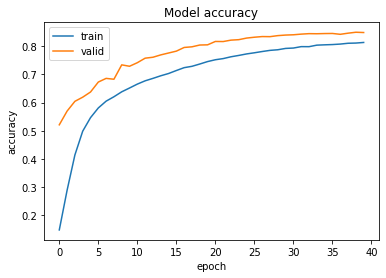

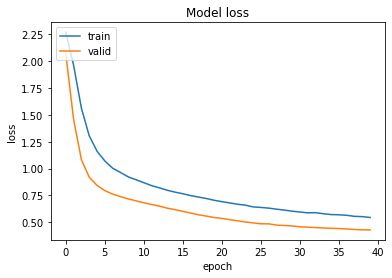

In [70]:
def display_history(history):
    """Summarize history for accuracy and loss.
    """
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()


display_history(history_dict['sgd'])

# Wait a minute! 
Why is the Valid loss is smaller than the training loss?

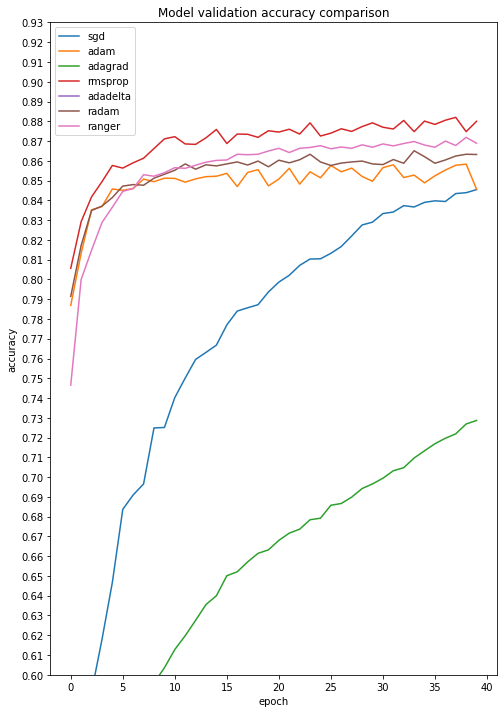

In [71]:
legend_list=[]
plt.figure(num=None, figsize=(8, 12))
for n, key in enumerate(optimizers):    

  #history=history_dict[key]
  #plt.plot(history.history['accuracy'])
  plt.plot(mean_values[n])
  legend_list.append(key)

plt.title('Model validation accuracy comparison')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.6, .93)
plt.yticks(np.arange(0.6, .93, step=0.01))
plt.legend(legend_list, loc='upper left')
plt.show()